<a href="https://colab.research.google.com/github/nihalsiddiqui7/got-matcher/blob/main/GOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_json("/content/script-bag-of-words.json")

In [ ]:
df.head()

,episodeAlt,seasonNum,episodeNum,episodeTitle,text
0,S1E1,1,1,Winter Is Coming,"[{'text': 'Easy, boy.', 'name': 'Will'}, {'tex..."
1,S1E2,1,2,The Kingsroad,"[{'text': 'And You child... drink, eat. need t..."
2,S1E3,1,3,Lord Snow,[{'text': 'Council. Grand Lord Maester Pycelle...
3,S1E4,1,4,"Cripples, Bastards, and Broken Things",[{'text': 'Lord's The again. been dreaming lit...
4,S1E5,1,5,The Wolf and the Lion,[{'text': 'Does Hugh Ser any capital? family h...


In [ ]:
dialogue= {}
for index , row in df.iterrows():
  for item in row['text']:
    if item['name']in dialogue:
      dialogue[item['name']] = dialogue[item['name']]+ item['text']
    else:
      dialogue[item['name']] = item['text']+ " "

In [ ]:
len(dialogue)

817

In [ ]:
final_df = pd.DataFrame()
final_df['character'] = dialogue.keys()
final_df['words'] = dialogue.values()

In [ ]:
final_df.head()

,character,words
0,Will,"Easy, boy. I've I've Wildlings a a do ever in ..."
1,Waymar Royce,One They're What a and another before d'you ea...
2,Gared,Wall. We back head should the to Our They We W...
3,Jon Snow,Father's Go on. watching. And mother. yourBran...
4,Septa Mordane,"Fine Well always. as done. work, I Quite beaut..."


In [ ]:
final_df['n_words']= final_df['words'].apply(lambda x: len(x.split()))

In [ ]:
final_df=final_df.sort_values('n_words', ascending=False)
final_df.head()

,character,words,n_words
17,Tyrion Lannister,It Mmh. Northern about girls. is say the they ...,25924
13,Cersei Lannister,And And Casterly One Rock. When about afraid. ...,14294
3,Jon Snow,Father's Go on. watching. And mother. yourBran...,11488
20,Daenerys Targaryen,We've a and anything. asked been for for guest...,11202
12,Jaime Lannister,"As I It's brother, duty feel it's much. my sho...",10823


In [ ]:
final_df = final_df.head(100)

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 17 to 49
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   character  100 non-null    object
 1   words      100 non-null    object
 2   n_words    100 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(stop_words='english')

In [ ]:
embeddings = cv.fit_transform(final_df['words']).toarray()

In [ ]:
embeddings.shape

(100, 15335)

In [ ]:
embeddings = embeddings.astype('float64')

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,verbose=1,random_state=123)

In [ ]:
x = tsne.fit_transform(embeddings)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.002s...
[t-SNE] Computed neighbors for 100 samples in 0.105s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 14.377887
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.776955
[t-SNE] KL divergence after 1000 iterations: 0.292866


In [ ]:
x.shape

(100, 2)

In [ ]:
final_df['x'] = x.T[0]
final_df['y'] = x.T[1]

In [ ]:
final_df.head()

,character,words,n_words,x,y
17,Tyrion Lannister,It Mmh. Northern about girls. is say the they ...,25924,0.354092,-4.297993
13,Cersei Lannister,And And Casterly One Rock. When about afraid. ...,14294,0.280050,-4.055722
3,Jon Snow,Father's Go on. watching. And mother. yourBran...,11488,0.498793,-3.883101
20,Daenerys Targaryen,We've a and anything. asked been for for guest...,11202,-0.218605,-3.652980
12,Jaime Lannister,"As I It's brother, duty feel it's much. my sho...",10823,0.333913,-3.854338


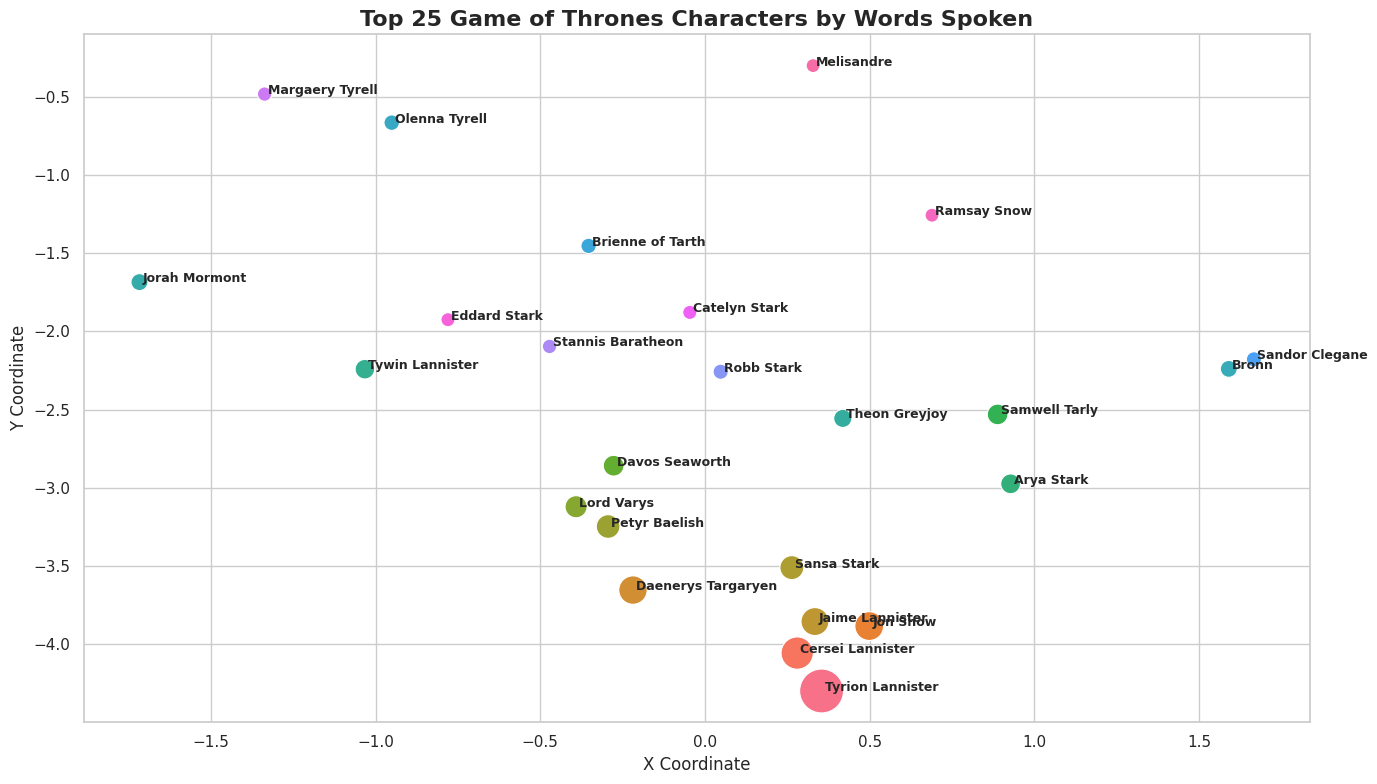

In [ ]:
top_25 = final_df.sort_values(by='n_words', ascending=False).head(25).copy()



import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 8))
sns.set(style='whitegrid')

plot = sns.scatterplot(data=top_25, x='x', y='y', size='n_words',
                       sizes=(100, 1000), hue='character', legend=False)

# Annotate
for i in range(len(top_25)):
    plt.text(top_25['x'].iloc[i] + 0.01, top_25['y'].iloc[i],
             top_25['character'].iloc[i], fontsize=9, weight='bold')

plt.title('Top 25 Game of Thrones Characters by Words Spoken', fontsize=16, weight='bold')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.tight_layout()
plt.grid(True)

plt.show()

In [ ]:
# Save top_25 DataFrame to CSV
top_25[['character', 'n_words', 'x', 'y']].to_csv('top_25_characters.csv', index=False)
